DATA SET DE SALUD, NUTRICION Y OBESIDAD.

In [1]:
nombre="joseluis"
print(nombre)

joseluis


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#dataset de kaggle
link="https://www.kaggle.com/datasets/ankurbajaj9/obesity-levels"
print(link)

https://www.kaggle.com/datasets/ankurbajaj9/obesity-levels


In [4]:
import pandas as pd

ruta_del_archivo = '/content/drive/MyDrive/Colab Notebooks/Obesity_DataSet.csv'
df = pd.read_csv(ruta_del_archivo)

# Muestra las primeras 5 filas para verificar que se cargó correctamente
print(df.head())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

In [5]:
#libreria.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [6]:
#lista de variables o etiquetas en la base datos, de salud, nutrición y obesidad.

variables_info = {
    'Gender': 'Género',
    'Age': 'Edad',
    'Height': 'Altura',
    'Weight': 'Peso',
    'family_history_with_overweight': 'Antecedentes familiares de sobrepeso',
    'FAVC': 'Frecuencia de consumo de alimentos calóricos',
    'FCVC': 'Frecuencia de consumo de vegetales',
    'NCP': 'Número de comidas principales',
    'CAEC': 'Consumo de alimentos entre comidas',
    'SMOKE': 'Si fuma o no',
    'CH2O': 'Consumo de agua',
    'SCC': 'Monitorea el consumo de calorías',
    'FAF': 'Frecuencia de actividad física',
    'TUE': 'Tiempo de uso de dispositivos tecnológicos',
    'CALC': 'Consumo de alcohol',
    'MTRANS': 'Medios de transporte utilizados',
    'NObeyesdad': 'Nivel de obesidad'
}
print(variables_info)


{'Gender': 'Género', 'Age': 'Edad', 'Height': 'Altura', 'Weight': 'Peso', 'family_history_with_overweight': 'Antecedentes familiares de sobrepeso', 'FAVC': 'Frecuencia de consumo de alimentos calóricos', 'FCVC': 'Frecuencia de consumo de vegetales', 'NCP': 'Número de comidas principales', 'CAEC': 'Consumo de alimentos entre comidas', 'SMOKE': 'Si fuma o no', 'CH2O': 'Consumo de agua', 'SCC': 'Monitorea el consumo de calorías', 'FAF': 'Frecuencia de actividad física', 'TUE': 'Tiempo de uso de dispositivos tecnológicos', 'CALC': 'Consumo de alcohol', 'MTRANS': 'Medios de transporte utilizados', 'NObeyesdad': 'Nivel de obesidad'}


In [7]:
# Se puede visualizar el dataset completo
df = pd.read_csv(ruta_del_archivo)
print(df.to_string())

      Gender        Age    Height      Weight family_history_with_overweight FAVC      FCVC       NCP        CAEC SMOKE      CH2O  SCC       FAF       TUE        CALC                 MTRANS           NObeyesdad
0     Female  21.000000  1.620000   64.000000                            yes   no  2.000000  3.000000   Sometimes    no  2.000000   no  0.000000  1.000000          no  Public_Transportation        Normal_Weight
1     Female  21.000000  1.520000   56.000000                            yes   no  3.000000  3.000000   Sometimes   yes  3.000000  yes  3.000000  0.000000   Sometimes  Public_Transportation        Normal_Weight
2       Male  23.000000  1.800000   77.000000                            yes   no  2.000000  3.000000   Sometimes    no  2.000000   no  2.000000  1.000000  Frequently  Public_Transportation        Normal_Weight
3       Male  27.000000  1.800000   87.000000                             no   no  3.000000  3.000000   Sometimes    no  2.000000   no  2.000000  0.000000  

In [8]:
#se verifica que los tipos de datos son correctos.
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [9]:
# Proceso completo de EDA.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [11]:
df["TUE"].value_counts()


,count
TUE,
0.000000,557
1.000000,292
2.000000,109
0.630866,4
0.002600,3
...,...
0.027093,1
0.790967,1
1.886855,1


In [12]:
df['TUE'] = df['TUE'].astype(int)

# Muestra las primeras 5 filas para verificar el cambio
print(df.head())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0    1          no   
1  3.0  Sometimes   yes   3.0  yes  3.0    0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0    1  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0    0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0    0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

In [13]:
df["TUE"].value_counts()

,count
TUE,
0,1415
1,587
2,109


In [14]:
#resumen descriptivo de las columnas numericas.
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.381336
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.582536
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.000000
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [15]:
# datos categoricos de las columnas.
df.describe(include='object')

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


In [16]:
import numpy as np
# Reemplaza los valores NaN (si existen) con un valor numérico (por ejemplo, 0)
df['Weight'] = df['Weight'].fillna(0)
df['Weight'] = df['Weight'].astype(int)
print(df.dtypes)


Gender                             object
Age                               float64
Height                            float64
Weight                              int64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                                 int64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


In [17]:
#permitir que la edad se almacene como numeros enteros.
import pandas as pd
df['Age'] = df['Age'].astype(int)

# Muestra las primeras 5 filas para verificar el cambio
print(df.head())

   Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  NCP  \
0  Female   21    1.62      64                            yes   no   2.0  3.0   
1  Female   21    1.52      56                            yes   no   3.0  3.0   
2    Male   23    1.80      77                            yes   no   2.0  3.0   
3    Male   27    1.80      87                             no   no   3.0  3.0   
4    Male   22    1.78      89                             no   no   2.0  1.0   

        CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS  \
0  Sometimes    no   2.0   no  0.0    1          no  Public_Transportation   
1  Sometimes   yes   3.0  yes  3.0    0   Sometimes  Public_Transportation   
2  Sometimes    no   2.0   no  2.0    1  Frequently  Public_Transportation   
3  Sometimes    no   2.0   no  2.0    0  Frequently                Walking   
4  Sometimes    no   2.0   no  0.0    0   Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Wei

In [18]:
# datos nulos, numericos, categoricos.
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Obesity_DataSet.csv')

display(df.head())
df.info()
display(df.describe())

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [19]:
# Verifica los valores faltantes
missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values)


Missing values per column:
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [20]:
#Identificar columnas numéricas
columnas_numericas = df.select_dtypes(include=np.number).columns
print("Columnas numéricas:")
print(columnas_numericas)

Columnas numéricas:
Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')


In [21]:
# Eliminar filas duplicadas
df_deduplicated = df.drop_duplicates()
print("Forma del DataFrame después de eliminar duplicados:\n", df_deduplicated.shape)

Forma del DataFrame después de eliminar duplicados:
 (2087, 17)


In [22]:
# Comparar el DataFrame original con el DataFrame después de eliminar duplicados
print("Forma del DataFrame original:", df.shape)
print("Forma del DataFrame después de eliminar duplicados:", df_deduplicated.shape)

filas_eliminadas = df.shape[0] - df_deduplicated.shape[0]
print(f"\nNúmero de filas eliminadas: {filas_eliminadas}")

Forma del DataFrame original: (2111, 17)
Forma del DataFrame después de eliminar duplicados: (2087, 17)

Número de filas eliminadas: 24


In [23]:
# Convertir 'yes' a 0 y 'no' a 1 en las columnas identificadas
columns_to_convert = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

for col in columns_to_convert:
    df_deduplicated[col] = df_deduplicated[col].replace({'yes': 0, 'no': 1})

print("DataFrame después de la conversión:")
print(df_deduplicated[columns_to_convert].head())

DataFrame después de la conversión:
   family_history_with_overweight  FAVC  SMOKE  SCC
0                               0     1      1    1
1                               0     1      0    0
2                               0     1      1    1
3                               1     1      1    1
4                               1     1      1    1


/tmp/ipython-input-284348142.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_deduplicated[col] = df_deduplicated[col].replace({'yes': 0, 'no': 1})
/tmp/ipython-input-284348142.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deduplicated[col] = df_deduplicated[col].replace({'yes': 0, 'no': 1})


In [24]:
# Identificar columnas con valores 'yes' y 'no'
for col in df_deduplicated.columns:
    if df_deduplicated[col].dtype == 'object':
        if 'yes' in df_deduplicated[col].unique() and 'no' in df_deduplicated[col].unique():
            print(f"La columna '{col}' contiene 'yes' y 'no'.")

In [25]:
#Calcula estadísticas descriptivas para columnas numéricas, como el promedio, la desviación estándar, el valor mínimo y máximo.
print(df.describe())

               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75% 

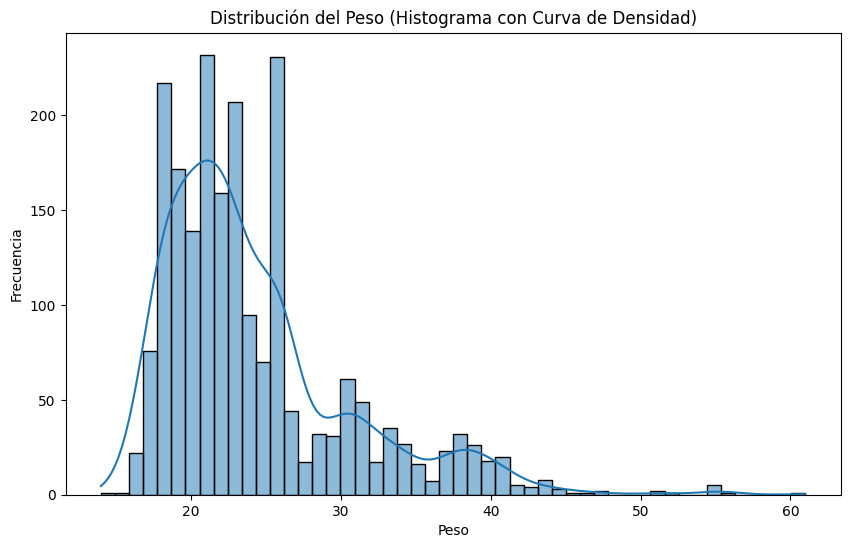

In [26]:
# Histograma con curva de densidad (simulando una campana de Gauss) para la columna 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', kde=True)
plt.title('Distribución del Peso (Histograma con Curva de Densidad)')
plt.xlabel('Peso')
plt.ylabel('Frecuencia')
plt.show()

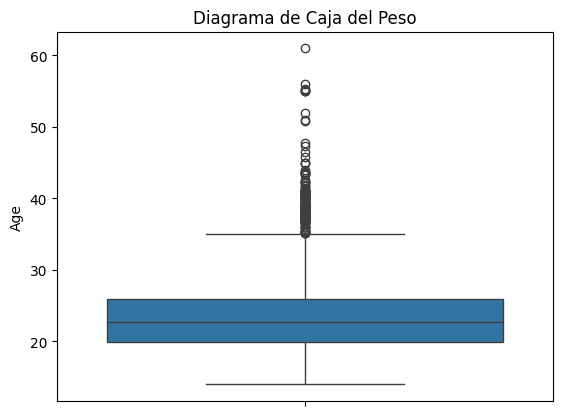

In [27]:
sns.boxplot(data=df, y='Age')
plt.title('Diagrama de Caja del Peso')
plt.show()


Correlation Matrix:


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,-0.025958,0.202560,0.016291,-0.043944,-0.045304,-0.144938,-0.296931
Height,-0.025958,1.000000,0.463136,-0.038121,0.243672,0.213376,0.294709,0.051912
Weight,0.202560,0.463136,1.000000,0.216125,0.107469,0.200575,-0.051436,-0.071561
FCVC,0.016291,-0.038121,0.216125,1.000000,0.042216,0.068461,0.019939,-0.101135
NCP,-0.043944,0.243672,0.107469,0.042216,1.000000,0.057088,0.129504,0.036326
CH2O,-0.045304,0.213376,0.200575,0.068461,0.057088,1.000000,0.167236,0.011965
FAF,-0.144938,0.294709,-0.051436,0.019939,0.129504,0.167236,1.000000,0.058562
TUE,-0.296931,0.051912,-0.071561,-0.101135,0.036326,0.011965,0.058562,1.000000


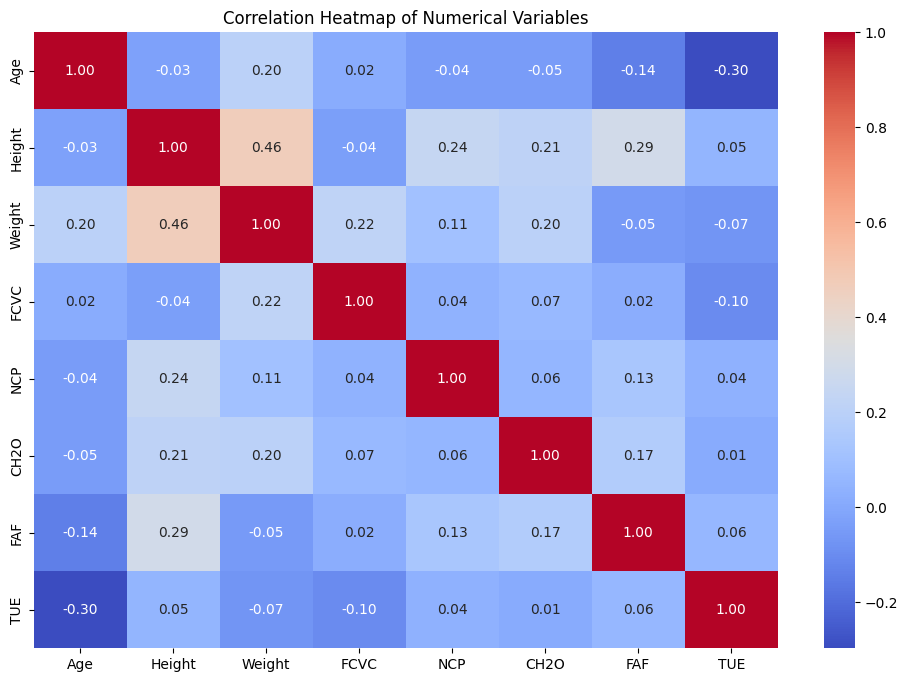

In [28]:
# Explora las relaciones entre variables
numerical_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_df.corr()

print("\nCorrelation Matrix:")
display(correlation_matrix)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

In [29]:
#regrecion lineal simple
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#  carga DataFrame 'df'
if 'df' not in locals():
    ruta_del_archivo = '/content/drive/MyDrive/Colab Notebooks/Obesity_DataSet.csv'
    df = pd.read_csv(ruta_del_archivo)

# Definir las variables x (independiente) y y (dependiente) para la regresión lineal simple
x_simple = df[['Age']] # Usamos solo 'Age' como variable independiente
y_simple = df['TUE']

# Divide los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
x_train_simple, x_test_simple, y_train_simple, y_test_simple = train_test_split(x_simple, y_simple, test_size=0.2, random_state=42)

print("Dimensiones del conjunto de entrenamiento (x_train_simple, y_train_simple):", x_train_simple.shape, y_train_simple.shape)
print("Dimensiones del conjunto de prueba (x_test_simple, y_test_simple):", x_test_simple.shape, y_test_simple.shape)

# Crea el modelo de regresión lineal simple
model_simple = LinearRegression()

# Entrena el modelo con los datos de entrenamiento
model_simple.fit(x_train_simple, y_train_simple)

print("Modelo de regresión lineal simple entrenado correctamente.")

# Realiza predicciones con el conjunto de prueba
y_pred_simple = model_simple.predict(x_test_simple)

print("Predicciones realizadas correctamente.")

# Evalúa el modelo
mse_simple = mean_squared_error(y_test_simple, y_pred_simple)
rmse_simple = np.sqrt(mse_simple)
r2_simple = r2_score(y_test_simple, y_pred_simple)
mae_simple = mean_absolute_error(y_test_simple, y_pred_simple)

Dimensiones del conjunto de entrenamiento (x_train_simple, y_train_simple): (1688, 1) (1688,)
Dimensiones del conjunto de prueba (x_test_simple, y_test_simple): (423, 1) (423,)
Modelo de regresión lineal simple entrenado correctamente.
Predicciones realizadas correctamente.


In [30]:
# Calcular MAPE ignorando los valores reales de cero
# Identificar las filas donde el valor real de y_test_simple no es cero
non_zero_indices = y_test_simple != 0
y_true_non_zero = y_test_simple[non_zero_indices]
y_pred_non_zero = y_pred_simple[non_zero_indices]
# Calcular MAPE solo para los valores no cero
if len(y_true_non_zero) > 0:
    mape_simple_non_zero = np.mean(np.abs((y_true_non_zero - y_pred_non_zero) / y_true_non_zero)) * 100
else:
    mape_simple_non_zero = float('inf') # O NaN, dependiendo de cómo se quiera representar



Métricas de evaluación para la Regresión Lineal Simple (Edad vs. TUE):
Error cuadrático medio (MSE): 0.37
Raíz del error cuadrático medio (RMSE): 0.61
Error Absoluto Medio (MAE): 0.50
Error Porcentual Absoluto Medio (MAPE, excluyendo ceros reales): 912.60%
Coeficiente de determinación (R²): 0.07

Coeficiente para 'Age': -0.03
Intercepción (Bias): 1.33


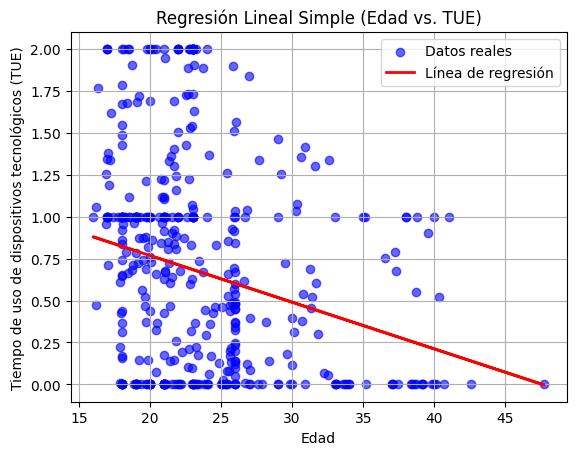

In [31]:
print(f"\nMétricas de evaluación para la Regresión Lineal Simple (Edad vs. TUE):")
print(f"Error cuadrático medio (MSE): {mse_simple:.2f}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse_simple:.2f}")
print(f"Error Absoluto Medio (MAE): {mae_simple:.2f}")
# print(f"Error Porcentual Absoluto Medio (MAPE con epsilon): {mape_simple_with_epsilon:.2f}%") # Opcional: mostrar el MAPE original
print(f"Error Porcentual Absoluto Medio (MAPE, excluyendo ceros reales): {mape_simple_non_zero:.2f}%")
print(f"Coeficiente de determinación (R²): {r2_simple:.2f}")

# Interpretar el coeficiente de la edad
print(f"\nCoeficiente para 'Age': {model_simple.coef_[0]:.2f}")
print(f"Intercepción (Bias): {model_simple.intercept_:.2f}")

# Visualiza los resultados (opcional, pero útil para ver la relación lineal)
plt.scatter(x_test_simple['Age'], y_test_simple, color='blue', label='Datos reales', alpha=0.6)
plt.plot(x_test_simple['Age'], y_pred_simple, color='red', linewidth=2, label='Línea de regresión')
plt.title('Regresión Lineal Simple (Edad vs. TUE)')
plt.xlabel('Edad')
plt.ylabel('Tiempo de uso de dispositivos tecnológicos (TUE)')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
#regrecion lineal multiple
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [33]:
# Definir las variables independientes (x) y dependiente (y) para la regresión lineal múltiple
x_multiple = df[['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF']]
y_multiple = df['TUE']

In [34]:
# Divide los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
x_train_multiple, x_test_multiple, y_train_multiple, y_test_multiple = train_test_split(x_multiple, y_multiple, test_size=0.2, random_state=42)

print("Dimensiones del conjunto de entrenamiento (x_train_multiple, y_train_multiple):", x_train_multiple.shape, y_train_multiple.shape)
print("Dimensiones del conjunto de prueba (x_test_multiple, y_test_multiple):", x_test_multiple.shape, y_test_multiple.shape)

Dimensiones del conjunto de entrenamiento (x_train_multiple, y_train_multiple): (1688, 7) (1688,)
Dimensiones del conjunto de prueba (x_test_multiple, y_test_multiple): (423, 7) (423,)


In [35]:
# Crea el modelo de regresión lineal múltiple
model_multiple = LinearRegression()

# Entrena el modelo con los datos de entrenamiento
model_multiple.fit(x_train_multiple, y_train_multiple)

print("Modelo de regresión lineal múltiple entrenado correctamente.")

# Realiza predicciones con el conjunto de prueba
y_pred_multiple = model_multiple.predict(x_test_multiple)


Modelo de regresión lineal múltiple entrenado correctamente.


In [36]:
# Evalúa el modelo
mse_multiple = mean_squared_error(y_test_multiple, y_pred_multiple)
rmse_multiple = np.sqrt(mse_multiple)
r2_multiple = r2_score(y_test_multiple, y_pred_multiple)
mae_multiple = mean_absolute_error(y_test_multiple, y_pred_multiple)

In [37]:
# Calcula MAPE, evitando división por cero (similar a la regresión simple)
epsilon = 1e-10 # una constante pequeña
mape_multiple = np.mean(np.abs((y_test_multiple - y_pred_multiple) / (y_test_multiple + epsilon))) * 100

In [38]:
print(f"\nMétricas de evaluación para la Regresión Lineal Múltiple:")
print(f"Error cuadrático medio (MSE): {mse_multiple:.2f}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse_multiple:.2f}")
print(f"Error Absoluto Medio (MAE): {mae_multiple:.2f}")
print(f"Error Porcentual Absoluto Medio (MAPE): {mape_multiple:.2f}%")
print(f"Coeficiente de determinación (R²): {r2_multiple:.2f}")

# Interpretar los coeficientes del modelo de regresión lineal múltiple
print("\nCoeficientes del modelo de regresión lineal múltiple:")
for i, col in enumerate(x_multiple.columns):
    print(f"{col}: {model_multiple.coef_[i]:.2f}")

print(f"\nIntercepción (Bias): {model_multiple.intercept_:.2f}")


Métricas de evaluación para la Regresión Lineal Múltiple:
Error cuadrático medio (MSE): 0.36
Raíz del error cuadrático medio (RMSE): 0.60
Error Absoluto Medio (MAE): 0.49
Error Porcentual Absoluto Medio (MAPE): 132669600727.74%
Coeficiente de determinación (R²): 0.09

Coeficientes del modelo de regresión lineal múltiple:
Age: -0.03
Height: 0.37
Weight: -0.00
FCVC: -0.07
NCP: 0.02
CH2O: -0.01
FAF: -0.01

Intercepción (Bias): 0.84


In [39]:
#modelo de clasificacion.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [40]:
# identificar columnas categoricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_cols)

['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']


In [41]:
#Aplicar la codificación One-Hot a las columnas categóricas y mantener las columnas numéricas
preprocessor = make_column_transformer(
    (OneHotEncoder(), categorical_cols),
    remainder='passthrough'
)
df_encoded = preprocessor.fit_transform(df)
print(df_encoded)

[[1.       0.       0.       ... 2.       0.       1.      ]
 [1.       0.       0.       ... 3.       3.       0.      ]
 [0.       1.       0.       ... 2.       2.       1.      ]
 ...
 [1.       0.       0.       ... 2.054193 1.414209 0.646288]
 [1.       0.       0.       ... 2.852339 1.139107 0.586035]
 [1.       0.       0.       ... 2.863513 1.026452 0.714137]]


In [42]:
# Obtener los nombres de las funciones después de la codificación one-hot
onehot_feature_names = preprocessor.named_transformers_['onehotencoder'].get_feature_names_out(categorical_cols)
passthrough_feature_names = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [43]:
# Crea una lista de todos los nombres de columnas en el orden correcto
all_feature_names = list(onehot_feature_names) + passthrough_feature_names
print(all_feature_names)

['Gender_Female', 'Gender_Male', 'family_history_with_overweight_no', 'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes', 'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Always', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking', 'NObeyesdad_Insufficient_Weight', 'NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I', 'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III', 'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


In [44]:
# Convierte los datos codificados en un DataFrame de pandas
df_encoded = pd.DataFrame(df_encoded, columns=all_feature_names)
display(df_encoded.head())

,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,...,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0
2,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0


In [45]:
# Separar la variable objetivo 'NObeyesdad' del DataFrame original
y = df['NObeyesdad']

# Las características 'x' serán todas las columnas en df_encoded excepto las que corresponden a NObeyesdad
# Identificar las columnas que corresponden a la codificación One-Hot de NObeyesdad
nobeyesdad_encoded_cols = [col for col in df_encoded.columns if col.startswith('NObeyesdad_')]

# Las características 'x' son df_encoded sin esas columnas
x = df_encoded.drop(columns=nobeyesdad_encoded_cols)


print("Forma de las características (x):", x.shape)
print("Forma de la variable objetivo (y):", y.shape)

Forma de las características (x): (2111, 31)
Forma de la variable objetivo (y): (2111,)


In [46]:
# dividir los datos para garantizar la coherencia con el entrenamiento del modelo de clasificación
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("Dimensiones del conjunto de entrenamiento (x_train, y_train):", x_train.shape, y_train.shape)
print("Dimensiones del conjunto de prueba (x_test, y_test):", x_test.shape, y_test.shape)

Dimensiones del conjunto de entrenamiento (x_train, y_train): (1688, 31) (1688,)
Dimensiones del conjunto de prueba (x_test, y_test): (423, 31) (423,)


In [47]:
# Entrenar un modelo de clasificación
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [48]:
# Realizar predicciones con el modelo de clasificación
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de confusión:")
display(pd.DataFrame(conf_matrix, index=model.classes_, columns=model.classes_))

Precisión del modelo: 0.95

Reporte de clasificación:
                     precision    recall  f1-score   support

Insufficient_Weight       0.96      0.96      0.96        56
      Normal_Weight       0.84      0.95      0.89        62
     Obesity_Type_I       0.99      0.92      0.95        78
    Obesity_Type_II       0.97      0.98      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.92      0.86      0.89        56
Overweight_Level_II       0.94      0.94      0.94        50

           accuracy                           0.95       423
          macro avg       0.95      0.95      0.95       423
       weighted avg       0.95      0.95      0.95       423


Matriz de confusión:


,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Insufficient_Weight,54,2,0,0,0,0,0
Normal_Weight,2,59,0,0,0,1,0
Obesity_Type_I,0,2,72,2,0,1,1
Obesity_Type_II,0,0,1,57,0,0,0
Obesity_Type_III,0,0,0,0,63,0,0
Overweight_Level_I,0,6,0,0,0,48,2
Overweight_Level_II,0,1,0,0,0,2,47


In [49]:
# matriz de confucion.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

print("Dimensiones del conjunto de entrenamiento (x_train, y_train):", x_train.shape, y_train.shape)
print("Dimensiones del conjunto de prueba (x_test, y_test):", x_test.shape, y_test.shape)

Dimensiones del conjunto de entrenamiento (x_train, y_train): (1688, 31) (1688,)
Dimensiones del conjunto de prueba (x_test, y_test): (423, 31) (423,)


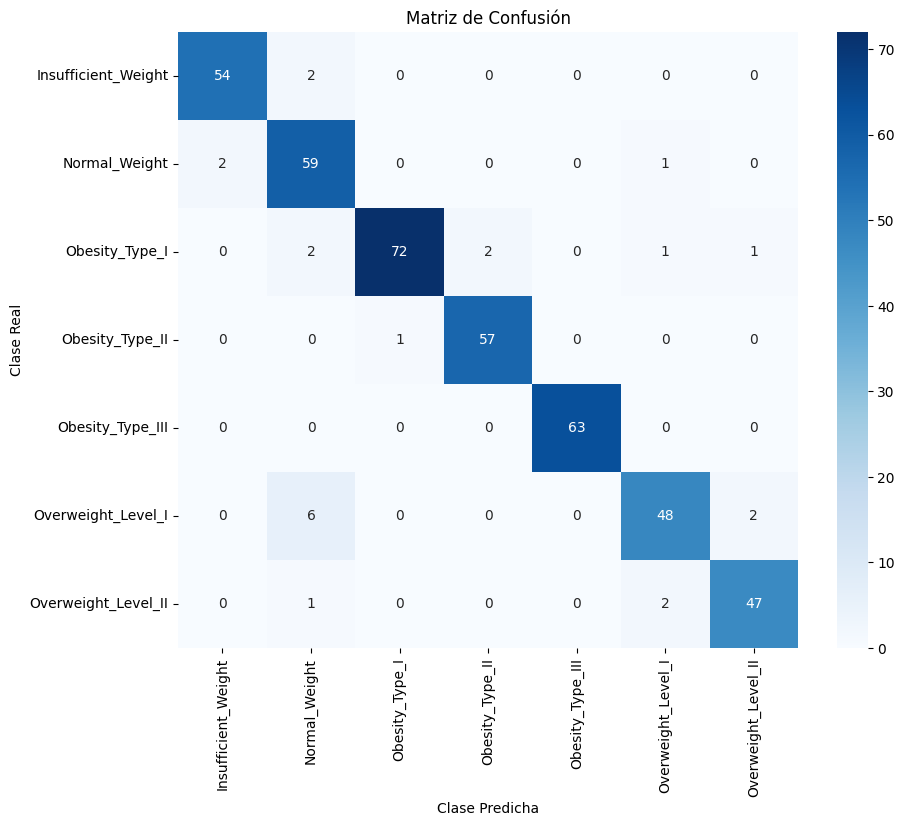

In [50]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Clase Predicha')
plt.ylabel('Clase Real')
plt.title('Matriz de Confusión')
plt.show()

In [51]:
#regresión logística
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

ruta_del_archivo = '/content/drive/MyDrive/Colab Notebooks/Obesity_DataSet.csv'
try:
    df = pd.read_csv(ruta_del_archivo)
    print("Dataset loaded successfully.")

except FileNotFoundError:
    print(f"Error: The file was not found at {ruta_del_archivo}")
    print("Please ensure the file is in your Google Drive and that Google Drive is mounted.")

Dataset loaded successfully.


In [52]:
# Identificar columnas categóricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Aplicar codificación One-Hot a las columnas categóricas y mantener las columnas numéricas
preprocessor = make_column_transformer(
    (OneHotEncoder(), categorical_cols),
    remainder='passthrough'
)
df_encoded = preprocessor.fit_transform(df)

In [53]:
# Obtener los nombres de las características después de la codificación
onehot_feature_names = preprocessor.named_transformers_['onehotencoder'].get_feature_names_out(categorical_cols)
passthrough_feature_names = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
all_feature_names = list(onehot_feature_names) + passthrough_feature_names

In [54]:
# Convierte los datos codificados en un DataFrame de pandas
x = pd.DataFrame(df_encoded, columns=all_feature_names)

#Separar la variable de destino 'NObeyesdad' del DataFrame original
y = df['NObeyesdad']
print(y)


0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: NObeyesdad, Length: 2111, dtype: object


In [55]:
#Las características 'x' serán todas las columnas en df_encoded excepto aquellas correspondientes a NObeyesdad
nobeyesdad_encoded_cols = [col for col in x.columns if col.startswith('NObeyesdad_')]
x = x.drop(columns=nobeyesdad_encoded_cols)



In [56]:
# Dividir los datos en conjuntos de entrenamiento y prueba (80 % entrenamiento, 20 % prueba)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [57]:
# Instanciar el modelo de regresión logística
model_lr = LogisticRegression(random_state=42, solver='liblinear')


# Entrena el modelo con los datos de entrenamiento
model_lr.fit(x_train, y_train)
print("Modelo de Regresión Logística entrenado correctamente.")



Modelo de Regresión Logística entrenado correctamente.


In [58]:
# Realizar predicciones con el conjunto de prueba
y_pred_lr = model_lr.predict(x_test)
print("Predicciones realizadas correctamente.")

Predicciones realizadas correctamente.


In [59]:
# Calcular la precisión
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Precisión del modelo de Regresión Logística: {accuracy_lr:.2f}")

Precisión del modelo de Regresión Logística: 0.73


In [60]:
# Generar informe de clasificación
print("\nReporte de clasificación del modelo de Regresión Logística:")
print(classification_report(y_test, y_pred_lr))


Reporte de clasificación del modelo de Regresión Logística:
                     precision    recall  f1-score   support

Insufficient_Weight       0.82      0.96      0.89        56
      Normal_Weight       0.80      0.39      0.52        62
     Obesity_Type_I       0.68      0.63      0.65        78
    Obesity_Type_II       0.77      0.98      0.86        58
   Obesity_Type_III       0.93      1.00      0.96        63
 Overweight_Level_I       0.57      0.62      0.60        56
Overweight_Level_II       0.48      0.50      0.49        50

           accuracy                           0.73       423
          macro avg       0.72      0.73      0.71       423
       weighted avg       0.73      0.73      0.71       423



In [61]:
# Calcular la matriz de confusión
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("\nMatriz de confusión del modelo de Regresión Logística:")
display(pd.DataFrame(conf_matrix_lr, index=model_lr.classes_, columns=model_lr.classes_))


Matriz de confusión del modelo de Regresión Logística:


,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Insufficient_Weight,54,0,0,0,0,2,0
Normal_Weight,12,24,3,0,1,13,9
Obesity_Type_I,0,2,49,14,3,3,7
Obesity_Type_II,0,0,1,57,0,0,0
Obesity_Type_III,0,0,0,0,63,0,0
Overweight_Level_I,0,3,5,1,1,35,11
Overweight_Level_II,0,1,14,2,0,8,25


Coeficientes del modelo de Regresión Logística por Clase:


,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,...,MTRANS_Public_Transportation,MTRANS_Walking,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Insufficient_Weight,-0.042522,1.191174,0.461969,0.686684,0.410168,0.738484,-1.246407,1.494128,0.686485,0.214446,...,0.315062,-0.084652,-0.079063,5.143013,-0.373706,0.976166,0.789776,0.517810,0.208170,0.497730
Normal_Weight,0.116204,0.989318,0.670447,0.435075,0.685330,0.420192,1.929979,-0.110417,-0.330311,-0.383730,...,-0.299514,1.299616,0.000958,0.544928,-0.065538,-0.228160,0.067046,-0.291880,0.226487,-0.221922
Obesity_Type_I,0.336097,0.091247,-0.612329,1.039674,-0.463069,0.890413,0.562735,-0.287925,1.045349,-0.892815,...,-0.119171,-0.362748,-0.008206,-2.535216,0.020992,-1.333498,-0.535428,0.472389,0.045885,-0.038125
Obesity_Type_II,-4.877854,2.578522,-1.293773,-1.005559,-0.870022,-1.429310,-0.599438,-1.492377,-0.159533,-0.047985,...,-0.637047,-0.524701,0.089248,-5.281994,0.171004,-0.093338,-0.299133,-1.559985,-0.374445,-0.458219
Obesity_Type_III,2.106945,-3.878074,-0.777677,-0.993452,-0.691165,-1.079964,-0.668283,-0.373552,-0.650212,-0.079082,...,-0.879490,-0.105280,-0.282727,-3.584988,0.163477,0.925969,0.505878,0.043684,-2.345808,-0.674940
Overweight_Level_I,0.079286,-0.056737,-0.317027,0.339576,-0.535278,0.557827,-0.702371,-1.425872,0.191490,1.959301,...,-0.378433,-0.203877,-0.014454,1.496986,-0.040065,-0.365232,-0.269458,0.227232,0.126305,-0.332619
Overweight_Level_II,-0.934912,0.141586,-1.200252,0.406926,0.479701,-1.273027,-0.747892,-0.160151,0.747619,-0.632903,...,0.449983,-0.471602,0.103901,0.599453,-0.030520,-0.375324,-0.380140,0.186043,-0.225505,0.368556


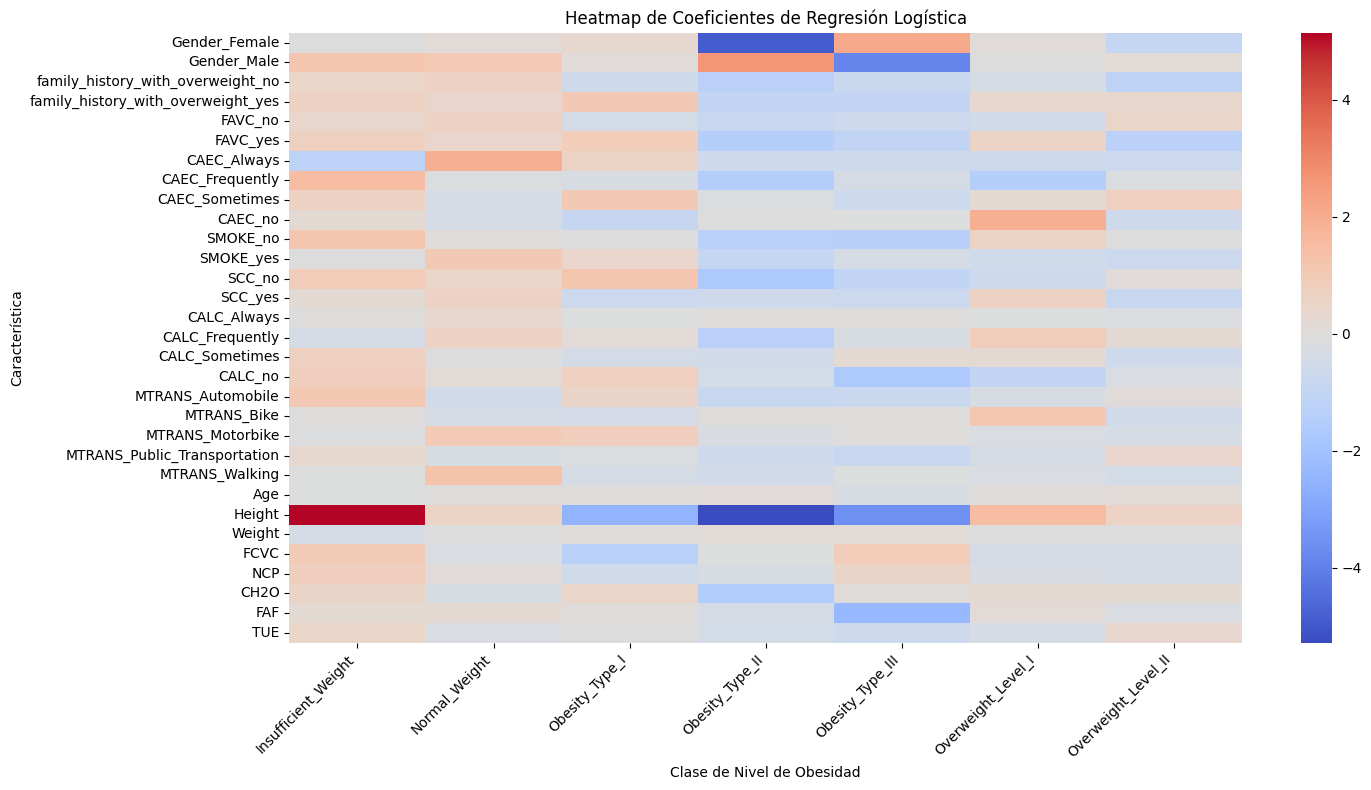

In [62]:
# Obtener los coeficientes del modelo y los nombres de las características
coefficients = model_lr.coef_
feature_names = x.columns # Usamos los nombres de las características del DataFrame codificado original 'x'
class_names = model_lr.classes_

# Crear un DataFrame para visualizar los coeficientes
coef_df = pd.DataFrame(coefficients, columns=feature_names, index=class_names)

print("Coeficientes del modelo de Regresión Logística por Clase:")
display(coef_df)

# Opcional: Visualizar los coeficientes (por ejemplo, con un heatmap)
# Esto puede ser útil si el número de características y clases no es demasiado grande
plt.figure(figsize=(15, 8))
sns.heatmap(coef_df.T, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Coeficientes de Regresión Logística')
plt.xlabel('Clase de Nivel de Obesidad')
plt.ylabel('Característica')
plt.xticks(rotation=45, ha='right') # Rota las etiquetas del eje x para mejor legibilidad
plt.yticks(rotation=0)
plt.tight_layout() # Ajusta el diseño para evitar que las etiquetas se solapen
plt.show()